<a href="https://colab.research.google.com/github/Lu1sV1rus/EDP/blob/main/M%C3%A9todo_de_Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5>Método de Colocación

---



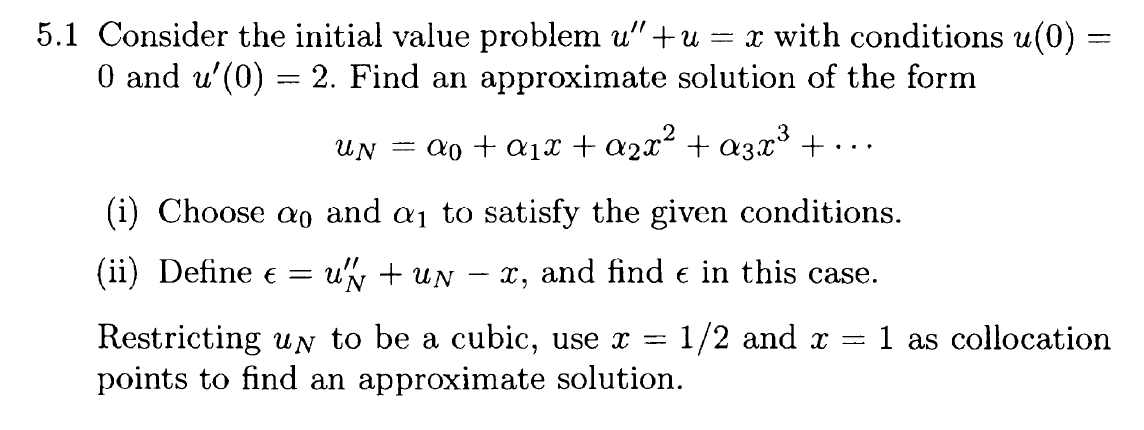

<font size=3> Importamos las librerias a utilizar

In [137]:
import sympy as sp                      # Para las soluciones, variables, ecuaciones
import numpy as np                      # Para los arrays (vectores) y graficas
import matplotlib.pyplot as plt         # Para las graficas
from tabulate import tabulate           # Para las tablas (presentar los errores)

<font size=3> Definimos las variables <font color=purple>$x,a,b$

In [138]:
x, a, b = sp.symbols("x, a, b")         # Variables
u = sp.Function("u")                    # Funcion

<font size=3> Escribimos la ecuación a resolver <font color=purple>$u''(x)+u(x)-x$

In [139]:
ecu = u(x).diff(x, 2) + u(x) - x        # Ecuacion
ecu

-x + u(x) + Derivative(u(x), (x, 2))

<font size=3> Resolvemos la ecuación con sympy, agregando las restricciones <font color=purple>$u(0)=0$ </font><font size=3> y <font color=purple>$u'(0)=0$

---

<font size=2 color=purple>sp.dsolve(eq, func, hint='default', **kwargs)

<font size=2 color=purple>sp.dsolve

Nos permite encontrar la solución analítica de la ecuacion $ecu$

<font size=2 color=purple>eq

La ecuación diferencial

<font size=2 color=purple>func

La función desconocida

<font size=2 color=purple>hint

Indica el método de resolución que debe intentar SymPy (ej. 'separable', 'linear', '1st_linear')

<font size=2 color=purple>ics={}

Le indica a dsolve que debe usar las condiciones iniciales proporcionadas

In [140]:
sol = sp.dsolve(ecu, ics={u(0):0, sp.diff(u(x), x).subs(x, 0):2})     # Solucionamos la ecuacion con las restricciones
sol

Eq(u(x), x + sin(x))

<font size=3> Creamos una funcion que nos regrese el valor exacto

---

<font size=2 color=purple>sp.lambdify

Nos permite crear vectores para evaluar el vector $X$

<font size=2 color=purple>sp.simplify

Reduce los valores a su forma mas simple, nos ayuda a que sea un numero (float), en lugar de una expresion (ej, 0.04+sin(10))

<font size=2 color=purple>sol.rhs

Nos da el valor de la sol



In [141]:
valorex = sp.lambdify(x, sp.simplify(sol.rhs), "numpy")   # Creamos un metodo que nos regresa los valores exactos (reales)

<font size=3> Graficamos

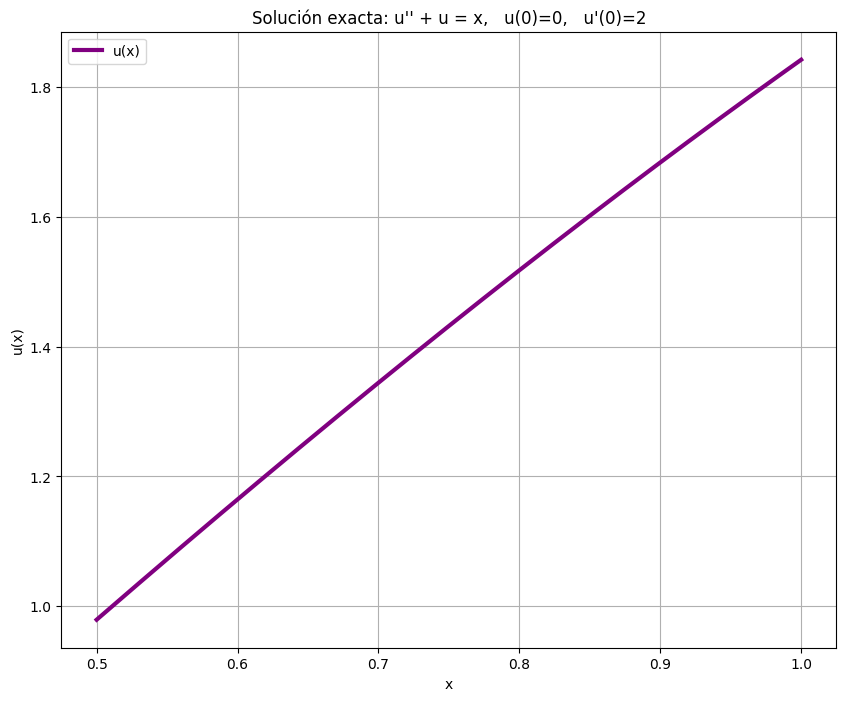

In [142]:
xx = np.linspace(0.5, 1, 200)                        # Valores en X
yy = valorex(xx)                                     # Valores en Y
plt.figure(figsize=(10,8))                           # Cramos un plano de 10x8
plt.plot(xx, yy, label="u(x)", linewidth=3, color="purple")     # Linea
plt.title("Solución exacta: u'' + u = x,   u(0)=0,   u'(0)=2")  # Titulo
plt.xlabel("x")                                      # Etiqueta en X
plt.ylabel("u(x)")                                   # Etiqueta en Y
plt.grid()                                           # Cuadricula
plt.legend()                                         # Etiquetas
plt.show()                                           # Mostrar

<font size=3> Escribimos la ecuacion $u_N$ = $2x+ax^2+bx^3$

In [143]:
un = 2*x + a*x**2 + b*x**3              # Guardamos la ecuacion en un
un

a*x**2 + b*x**3 + 2*x

<font size=3> Calculamos la ecuacion $u_N''$ = $2a+6bx$

In [144]:
un2 = sp.simplify(sp.diff(un, x, 2))    # Guardamos la segunda derivada en un2, usamos simplify para reducir terminos
un2

2*a + 6*b*x

<font size=3> Definimos la ecuacion $e$ = $u_N''+u_N-x$

In [145]:
e = sp.simplify(un2 + un - x)           # Guardamos la ecuacion en e, usamos simplify para reducir terminos
e

a*x**2 + 2*a + b*x**3 + 6*b*x + x

<font size=3> Asignamos las restricciones

In [146]:
points = [sp.Rational(1, 2), 1]         # Creamos un vector con los valores de los puntos de colocacion
points

[1/2, 1]

<font size=3> Resolvemos

---

<font size=2 color=purple>sp.Eq

Nos permite crear una ecuacion $e.subs(x,p)$

<font size=2 color=purple>e.subs(x,p)

Evaluamos los puntos $[0.5,1]$ en $e$ = $ax^2+2a+bx^3+6bx+x$

<font size=2 color=purple>for p in points

Indicamos que resuelva en ambos valores, los p en points = $[0.5,1]$

In [147]:
ecu2 = [sp.Eq(e.subs(x, p), 0) for p in points]    # Planteamos la ecuacion 2
sol2 = sp.solve(ecu2, [a, b])                      # Resolvemos la ecuacion 2
sol2

{a: -1/17, b: -2/17}

<font size=3> Creamos una funcion que nos regrese el valor esperado de la funcion

---

<font size=2 color=purple>sp.lambdify

Nos permite crear vectores para evaluar el vector $X$

<font size=2 color=purple>un.subs()

Sustituye los valores en un, por los que se obtiene de la $sol2$

<font size=2 color=purple>sol2

Que contiene la solucion con los puntos de colocacion ($points$=$0.5,1$)

In [148]:
valores = sp.lambdify(x, un.subs(sol2) , "numpy")    # Creamos un metodo que nos regresa los valores esperados (calculados con el metodo)

<font size=3> Graficamos

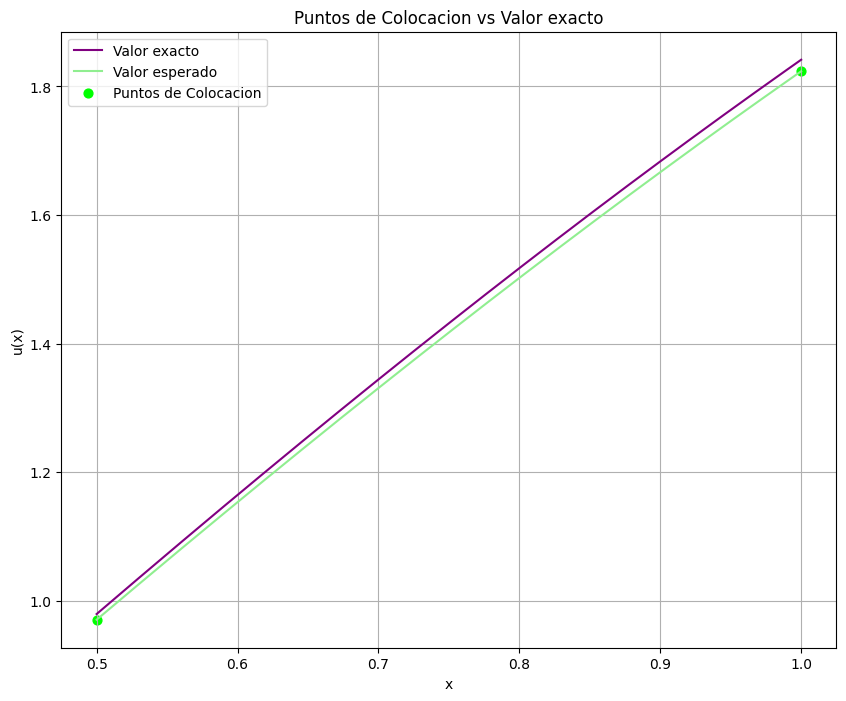

In [154]:
xx = np.linspace(0.5, 1, 200)                        # Valores en X
y2 = valores(xx)                                     # Valores en Y2 (esperados)
plt.figure(figsize=(10,8))                           # Cramos un plano de 10x8
plt.plot(xx, yy, label="Valor exacto", color="purple")            # Linea exactos
plt.plot(xx, y2, label="Valor esperado", color="lightgreen")      # Linea esperados
plt.scatter([0.5, 1.0], valores(np.array([0.5, 1.0])), color="lime", s=40, label="Puntos de Colocacion") # Puntos de Colocacion
plt.title("Puntos de Colocacion vs Valor exacto")    # Titulo
plt.xlabel("x")                                      # Etiqueta en X
plt.ylabel("u(x)")                                   # Etiqueta en Y
plt.grid()                                           # Cuadricula
plt.legend()                                         # Etiquetas
plt.show()                                           # Mostrar

<font size=3> Calculamos el error

In [167]:
xx = np.linspace(0, 1, 10)                      # Valores en X
vex = valorex(xx)                               # Valores exactos
ves = valores(xx)                               # Valores esperados

error = abs(vex-ves)                            # Error

tabla = list(zip(xx, vex, ves, error))          # Creamos una tabla con los valores
head = ["x", "Valor exacto", "Valor esperado", "Error absoluto"]  # Titulos
print(tabulate(tabla, headers=head, tablefmt="heavy_grid"))       # Imprimimos la tabla

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃        x ┃   Valor exacto ┃   Valor esperado ┃   Error absoluto ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━┫
┃ 0        ┃       0        ┃         0        ┃      0           ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━┫
┃ 0.111111 ┃       0.221994 ┃         0.221335 ┃      0.000659115 ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━┫
┃ 0.222222 ┃       0.44262  ┃         0.440249 ┃      0.00237144  ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━┫
┃ 0.333333 ┃       0.660528 ┃         0.655773 ┃      0.00475461  ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━┫
┃ 0.444444 ┃       0.874401 ┃         0.866941 ┃      0.00745979  ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━┫
┃ 0.555556 ┃       1.08297  ┃         1.07278  ┃      0.0101879   ┃
┣━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋

<font size=2 color=purple>np.max

Encuentra el valor max, dentro del vector error

<font size=2 color=purple>norma

Contiene el error absoluto máximo con la norma infinito

In [168]:
norma = np.max(error)
print("El error de la Norma", norma)

El error de la Norma 0.01794157304319066
